In [1]:
# import of necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# connecting to the API for the companies
msft = yf.Ticker("MSFT")
aapl = yf.Ticker("AAPL")
ibm = yf.Ticker("IBM")

In [3]:
# retrieving the required company data
msft_info = msft.info
aapl_info = aapl.info
ibm_info = ibm.info

msft_pl = msft.financials
aapl_pl = aapl.financials
ibm_pl = ibm.financials

msft_bs = msft.balance_sheet
aapl_bs = aapl.balance_sheet
ibm_bs = ibm.balance_sheet

msft_cf = msft.cashflow
aapl_cf = aapl.cashflow
ibm_cf = ibm.cashflow

In [4]:
print(msft_info)

{'zip': '98052-6399', 'sector': 'Technology', 'fullTimeEmployees': 221000, 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that provides a collaboration platform and code hosting service for developers; Nuance provides healthcare and enterprise AI solutions; and Azure, a cloud platform. It also offers enterprise su

In [5]:
msft_pl.head(50)

,2022-06-30,2021-06-30,2020-06-30,2019-06-30
Research Development,24512000000.0,20716000000.0,19269000000.0,16876000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,83716000000.0,71102000000.0,53036000000.0,43688000000.0
Minority Interest,None,None,None,None
Net Income,72738000000.0,61271000000.0,44281000000.0,39240000000.0
Selling General Administrative,27725000000.0,25224000000.0,24709000000.0,23098000000.0
Gross Profit,135620000000.0,115856000000.0,96937000000.0,82933000000.0
Ebit,83383000000.0,69916000000.0,52959000000.0,42959000000.0
Operating Income,83383000000.0,69916000000.0,52959000000.0,42959000000.0
Other Operating Expenses,None,None,None,None


In [6]:
msft_bs.head(50)

,2022-06-30,2021-06-30,2020-06-30,2019-06-30
Intangible Assets,1.129800e+10,7.800000e+09,7.038000e+09,7.750000e+09
Total Liab,1.982980e+11,1.917910e+11,1.830070e+11,1.842260e+11
Total Stockholder Equity,1.665420e+11,1.419880e+11,1.183040e+11,1.023300e+11
Other Current Liab,5.938400e+10,5.261200e+10,4.600100e+10,4.586000e+10
Total Assets,3.648400e+11,3.337790e+11,3.013110e+11,2.865560e+11
Common Stock,8.693900e+10,8.311100e+10,8.055200e+10,7.852000e+10
Other Current Assets,1.693200e+10,1.347100e+10,1.151700e+10,1.013300e+10
Retained Earnings,8.428100e+10,5.705500e+10,3.456600e+10,2.415000e+10
Other Liab,3.085300e+10,3.168100e+10,3.449200e+10,3.569900e+10
Good Will,6.752400e+10,4.971100e+10,4.335100e+10,4.202600e+10


In [7]:
msft_cf.head(50)

,2022-06-30,2021-06-30,2020-06-30,2019-06-30
Investments,1.843800e+10,2.876000e+09,6.980000e+09,5.400000e+08
Change To Liabilities,8.052000e+09,7.431000e+09,5.230000e+09,4.694000e+09
Total Cashflows From Investing Activities,-3.031100e+10,-2.757700e+10,-1.222300e+10,-1.577300e+10
Net Borrowings,-9.023000e+09,-3.750000e+09,-5.518000e+09,-4.000000e+09
Total Cash From Financing Activities,-5.887600e+10,-4.848600e+10,-4.603100e+10,-3.688700e+10
Change To Operating Activities,-3.450000e+08,1.160000e+09,-6.730000e+08,-1.542000e+09
Issuance Of Stock,1.841000e+09,1.693000e+09,1.343000e+09,1.142000e+09
Net Income,7.273800e+10,6.127100e+10,4.428100e+10,3.924000e+10
Change In Cash,-2.930000e+08,6.480000e+08,2.220000e+09,-5.900000e+08
Repurchase Of Stock,-3.269600e+10,-2.738500e+10,-2.296800e+10,-1.954300e+10


In [8]:
# organizing the values in a dictionary
comp_dict = [
    {"comp": "Microsoft", "info": msft_info, "pl": msft_pl, "bs": msft_bs, "cf": msft_cf},
    {"comp": "Apple", "info": aapl_info, "pl": aapl_pl, "bs": aapl_bs, "cf": aapl_cf},
    {"comp": "IBM", "info": ibm_info, "pl": ibm_pl, "bs": ibm_bs, "cf": ibm_cf}
]

In [9]:
# function to calculate the different financial ratios
def ratio_collection(info, pl, bs, cf):

    net_profit_margin = pl.loc["Net Income"][0] / pl.loc["Total Revenue"][0]
    asset_turnover = pl.loc["Total Revenue"][0] / bs.loc["Total Assets"][0]
    equity_mulitplier = bs.loc["Total Assets"][0] / bs.loc["Total Stockholder Equity"][0]
    leverage = bs.loc["Total Liab"][0] / bs.loc["Total Stockholder Equity"][0]
    buyback_ratio = cf.loc["Repurchase Of Stock"][0] * -1 / info["marketCap"]
    ROE = net_profit_margin * asset_turnover * equity_mulitplier
    EPS = pl.loc["Net Income"][0] / info["sharesOutstanding"]

    return net_profit_margin, asset_turnover, equity_mulitplier, leverage, buyback_ratio, ROE, EPS

In [10]:
# Loop that iterates through the dictionary and uses the function above
# to calculate the respective ratios.
for entity in comp_dict:
    result = list(ratio_collection(info=entity["info"], pl=entity["pl"], 
    bs=entity["bs"], cf=entity["cf"]))

    entity["net_profit_margin"] = result[0]
    entity["asset_turnover"] = result[1]
    entity["equity_mulitplier"] = result[2]
    entity["leverage"] = result[3]
    entity["buyback_ratio"] = result[4]
    entity["ROE"] = result[5]
    entity["EPS"] = result[6]

In [11]:
# organizing the results in a dataframe
df = pd.DataFrame(comp_dict)
df = df.drop(columns=["info", "pl", "bs", "cf"])
df.head()

,comp,net_profit_margin,asset_turnover,equity_mulitplier,leverage,buyback_ratio,ROE,EPS
0,Microsoft,0.366863,0.543444,2.190679,1.190679,0.017722,0.436755,9.757635
1,Apple,0.253096,1.117852,6.961537,5.961537,0.040585,1.969589,6.273722
2,IBM,0.100138,0.434474,6.983810,5.978784,0.002399,0.303846,6.407310


In [12]:
info = msft_info
pl = msft_pl
bs = msft_bs
cf = msft_cf

In [13]:
#info = aapl_info
#pl = aapl_pl
#bs = aapl_bs
#cf = aapl_cf

In [14]:
#info = ibm_info
#pl = ibm_pl
#bs = ibm_bs
#cf = ibm_cf

In [15]:
# cash financed, assuming no interest earned on cash
stock_buyback_cash = 5e9
# divide by price per share at time of year-end reporting (MSFT 257, AAPL 142, IBM 134)
stock_buyback_stock = stock_buyback_cash / 257

bs.loc["Total Stockholder Equity"][0] -= stock_buyback_cash
cf.loc["Repurchase Of Stock"] -= stock_buyback_cash
info["sharesOutstanding"] -= stock_buyback_stock

bs.loc["Cash"][0] -= stock_buyback_cash

# ratios
net_profit_margin = pl.loc["Net Income"][0] / pl.loc["Total Revenue"][0]
asset_turnover = pl.loc["Total Revenue"][0] / bs.loc["Total Assets"][0]
equity_mulitplier = bs.loc["Total Assets"][0] / bs.loc["Total Stockholder Equity"][0]
leverage = bs.loc["Total Liab"][0] / bs.loc["Total Stockholder Equity"][0]
buyback_ratio = cf.loc["Repurchase Of Stock"][0] * -1 / info["marketCap"]
ROE = net_profit_margin * asset_turnover * equity_mulitplier
EPS = pl.loc["Net Income"][0] / info["sharesOutstanding"]

In [16]:
change_df_cash = [
    ['old_value', df.loc[0][1], df.loc[0][2], df.loc[0][3], df.loc[0][4], df.loc[0][5], df.loc[0][6], df.loc[0][7]],
    ['new_value_cash', net_profit_margin, asset_turnover, equity_mulitplier, leverage, buyback_ratio, ROE, EPS] 
]
change_df_table_cash = pd.DataFrame(change_df_cash, columns =['ratio','net_profit_margin', 'asset_turnover', 'equity_mulitplier', 'leverage', 'buyback_ratio', 'ROE', 'EPS'])
change_df_table_cash


,ratio,net_profit_margin,asset_turnover,equity_mulitplier,leverage,buyback_ratio,ROE,EPS
0,old_value,0.366863,0.543444,2.190679,1.190679,0.017722,0.436755,9.757635
1,new_value_cash,0.366863,0.543444,2.258484,1.227532,0.020432,0.450273,9.783168


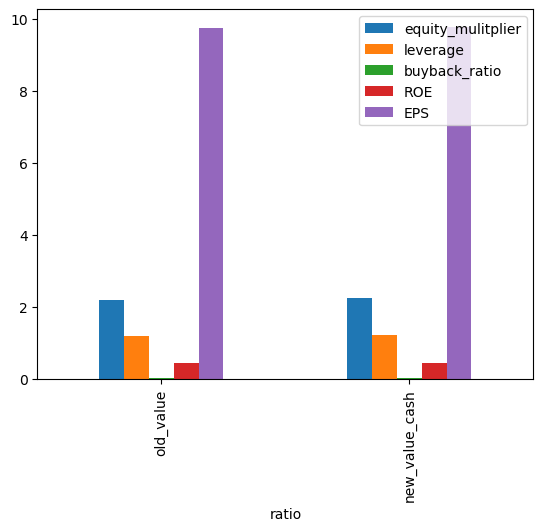

In [17]:
change_df_table_cash.plot(x='ratio', y=['equity_mulitplier', 'leverage', 'buyback_ratio', 'ROE', 'EPS'], kind='bar')
plt.show()

In [18]:
# debt financed, assuming 4% interest on new debt and no change in taxes
stock_buyback_cash = 5e9
# divide by price per share at time of year-end reporting (MSFT 257, AAPL 142, IBM 134)
stock_buyback_stock = stock_buyback_cash / 257 

bs.loc["Total Stockholder Equity"][0] -= stock_buyback_cash
cf.loc["Repurchase Of Stock"] -= stock_buyback_cash
info["sharesOutstanding"] -= stock_buyback_stock

bs.loc["Total Liab"][0] += stock_buyback_cash
pl.loc["Net Income"][0] -= (stock_buyback_cash * (4 / 100))

# ratios
net_profit_margin = pl.loc["Net Income"][0] / pl.loc["Total Revenue"][0]
asset_turnover = pl.loc["Total Revenue"][0] / bs.loc["Total Assets"][0]
equity_mulitplier = bs.loc["Total Assets"][0] / bs.loc["Total Stockholder Equity"][0]
leverage = bs.loc["Total Liab"][0] / bs.loc["Total Stockholder Equity"][0]
buyback_ratio = cf.loc["Repurchase Of Stock"][0] * -1 / info["marketCap"]
ROE = net_profit_margin * asset_turnover * equity_mulitplier
EPS = pl.loc["Net Income"][0] / info["sharesOutstanding"]

In [19]:
change_df_debt = [
    ['old_value', df.loc[0][1], df.loc[0][2], df.loc[0][3], df.loc[0][4], df.loc[0][5], df.loc[0][6], df.loc[0][7]],
    ['new_value_debt', net_profit_margin, asset_turnover, equity_mulitplier, leverage, buyback_ratio, ROE, EPS] 
]
change_df_table_debt = pd.DataFrame(change_df_debt, columns =['ratio','net_profit_margin', 'asset_turnover', 'equity_mulitplier', 'leverage', 'buyback_ratio', 'ROE', 'EPS'])
change_df_table_debt

,ratio,net_profit_margin,asset_turnover,equity_mulitplier,leverage,buyback_ratio,ROE,EPS
0,old_value,0.366863,0.543444,2.190679,1.190679,0.017722,0.436755,9.757635
1,new_value_debt,0.365855,0.543444,2.330621,1.298680,0.023143,0.463377,9.781865


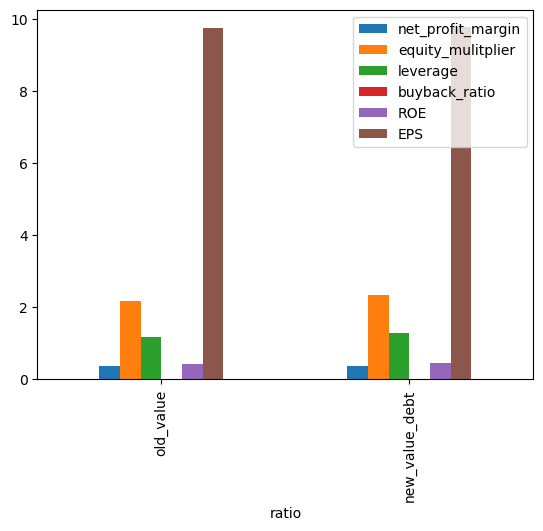

In [20]:
change_df_table_debt.plot(x='ratio', y=['net_profit_margin', 'equity_mulitplier', 'leverage', 'buyback_ratio', 'ROE', 'EPS'], kind='bar')
plt.show()

In [22]:
combine_item = change_df_table_debt.loc[change_df_table_debt['ratio'] == 'new_value_debt']
combined_df = pd.concat([change_df_table_cash,combine_item])
combined_df

,ratio,net_profit_margin,asset_turnover,equity_mulitplier,leverage,buyback_ratio,ROE,EPS
0,old_value,0.366863,0.543444,2.190679,1.190679,0.017722,0.436755,9.757635
1,new_value_cash,0.366863,0.543444,2.258484,1.227532,0.020432,0.450273,9.783168
1,new_value_debt,0.365855,0.543444,2.330621,1.298680,0.023143,0.463377,9.781865
